In [2]:
import matplotlib.pyplot as plt
import numpy as np
import cv2 as cv

### Реализация функции эрозии

In [2]:
def erosion(img: np.ndarray, kernel: np.ndarray) -> np.ndarray:
    y = kernel.shape[0] // 2
    x = kernel.shape[1] // 2
    
    processed_image = np.copy(img)
    
    for i in range(y, img.shape[0] - y):
        for j in range(x, img.shape[1] - x):
            local_window = img[i-y:i+y+1, j-x:j+x+1]
            processed_image[i][j] = np.min(local_window[kernel])
            
    return processed_image 

### Реализация функции дилатации

$$ A\oplus B=\bigcup_{b \in B}A_b $$



In [3]:
def dilate(img: np.ndarray, kernel: np.ndarray) -> np.ndarray:
    y = kernel.shape[0] // 2
    x = kernel.shape[1] // 2
    
    processed_image = np.copy(img)
    
    for i in range(y, img.shape[0] - y):
        for j in range(x, img.shape[1] - x):
            local_window = img[i-y:i+y+1, j-x:j+x+1]
            processed_image[i][j] = np.max(local_window[kernel])
            
    return processed_image

### Реализация функции отркытия

In [4]:
def opening(img: np.ndarray, kernel: np.ndarray) -> np.ndarray:
    temp = erosion(img, kernel)
    output = dilate(temp, kernel)
    return output

### Реализация операции закрытия

In [5]:
def closing(img: np.ndarray, kernel: np.ndarray) -> np.ndarray:
    temp = dilate(img, kernel)
    output = erosion(temp, kernel)
    return output

In [6]:
structs = {
    'cross3': np.array([[False,True,False],[True,True,True],[False,True,False]], dtype=bool),
    'rect3': np.ones((3,3), dtype=bool),
    'cross5': np.array([
        [False,False,True,False,False],
        [False,False,True,False,False],
        [True]*5,
        [False,False,True,False,False],
        [False,False,True,False,False]], dtype=bool),
    'rect5': np.ones((5,5), dtype=bool)
}

In [14]:
import math

def gradient(img: np.ndarray, approximate: bool)->np.ndarray:
    x, y = img.shape
    output = np.zeros((x,y), np.uint8)
    for i in range(1, x):
        for j in range(1, y):
            s1 = img[i][j]-img[i-1][j]
            s2 = img[i][j]-img[i][j-1]
            if approximate:
                output[i][j]=math.fabs(s1)+math.fabs(s2)
            else:
                output[i][j] = math.hypot(s1,s2)
    return output

def threshold_processing(img: np.ndarray, threshold: np.uint8)->np.ndarray:
    output = np.where(img > threshold, 255, 0)
    return output

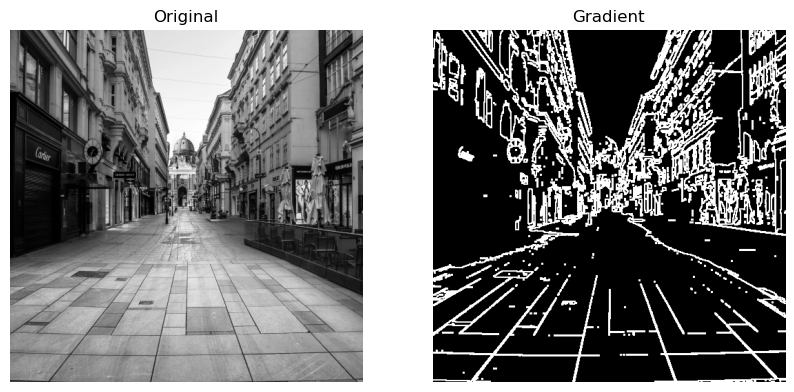

In [3]:
import cv2
import numpy as np

img = cv2.imread('../data/images/source_color/source_image_3_color.jpg', cv2.IMREAD_GRAYSCALE)

_, thresh = cv2.threshold(img, 0, 255, cv2.THRESH_BINARY_INV + cv2.THRESH_OTSU)

kernel = np.ones((3, 3), np.uint8)

grad = cv2.morphologyEx(thresh, cv2.MORPH_GRADIENT, kernel)

plt.figure(figsize=(10, 5))

plt.subplot(1, 2, 1)
plt.imshow(img, cmap='gray')
plt.title('Original')
plt.axis('off')

plt.subplot(1, 2, 2)
plt.imshow(grad, cmap='gray')
plt.title('Gradient')
plt.axis('off')

plt.show()

In [11]:
import cv2 as cv
import numpy as np
import matplotlib.pyplot as plt

img = cv.imread('../data/images/noize_mono/noize_image_2_mono.jpg', cv.IMREAD_GRAYSCALE)
assert img is not None, "file could not be read, check with os.path.exists()"
kernel = np.ones((5,5),np.uint8)

open = cv.morphologyEx(img, cv2.MORPH_OPEN, kernel)
close = cv.morphologyEx(open, cv2.MORPH_CLOSE, kernel)

plt.figure(figsize=(10, 5))

plt.subplot(1, 2, 1)
plt.imshow(img, cmap='gray')
plt.title('Original')
plt.axis('off')

plt.subplot(1, 2, 2)
plt.imshow(close, cmap='gray')
plt.title('Denoized')
plt.axis('off')

plt.show()